In [1]:
import numpy as np
import cv2 # loads the opencv library
# !pip install opencv-python
import matplotlib.pyplot as plt # for visualising the image
plt.rcParams.update({'font.size': 14})

In [2]:
image_files  = 'car1.jpg'
img = cv2.imread(image_files)

In [3]:
type(img)

numpy.ndarray

In [4]:
## (height, width, channels)
img.shape

(1280, 1918, 3)

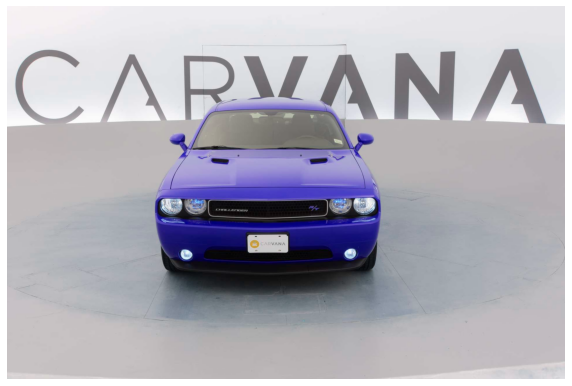

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()
# BGR as read by cv2

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

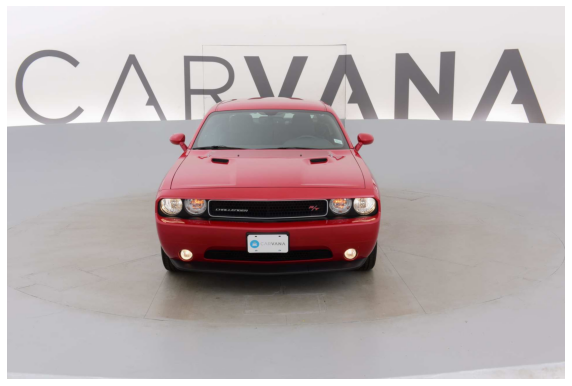

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()
# BGR as read by cv2

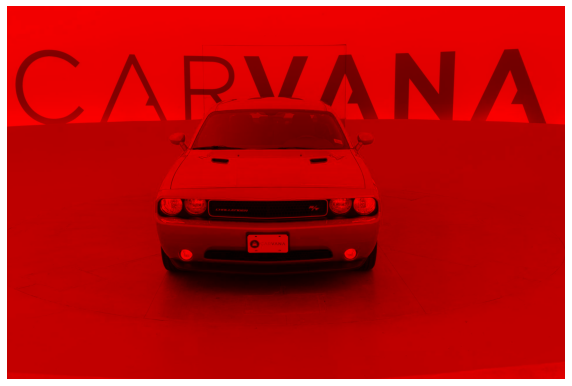

In [11]:
red_channel = np.copy(img)
red_channel[:, :, 1] = 0 # g
red_channel[:, :, 2] = 0 # b
plt.figure(figsize=(10,10))
plt.imshow(red_channel)
plt.axis(False)
plt.show()

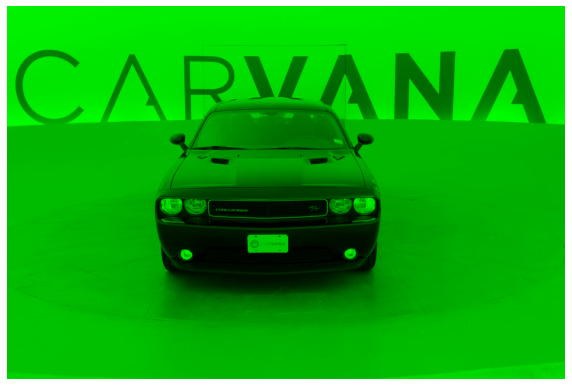

In [12]:
green_channel = np.copy(img)
green_channel[:, :, 0] = 0 # red
green_channel[:, :, 2] = 0 # blue
plt.figure(figsize=(10,10))
plt.imshow(green_channel)
plt.axis(False)blue_channel = np.copy(img)
blue_channel[:, :, 0] = 0 # red
blue_channel[:, :, 1] = 0 # green
plt.figure(figsize=(10,10))
plt.imshow(blue_channel)
plt.axis(False)
plt.show()
plt.show()

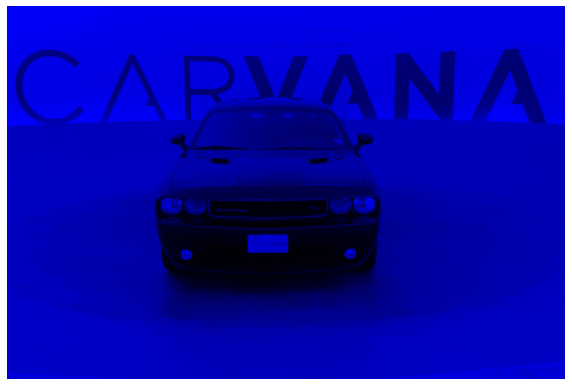

In [13]:
blue_channel = np.copy(img)
blue_channel[:, :, 0] = 0 # red
blue_channel[:, :, 1] = 0 # green
plt.figure(figsize=(10,10))
plt.imshow(blue_channel)
plt.axis(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


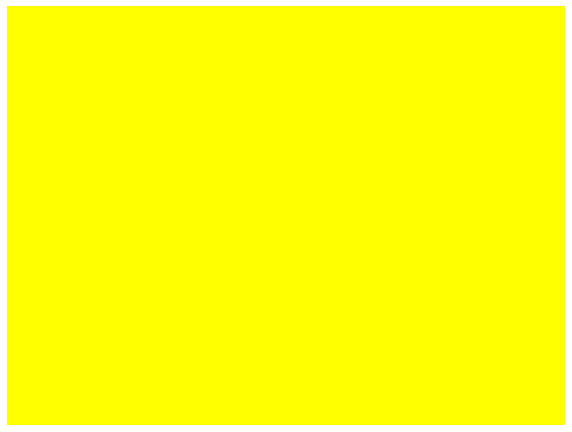

In [20]:
my_im = np.ones((480, 640, 3)) * 255
my_im[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(my_im)
plt.axis(False)
plt.show()

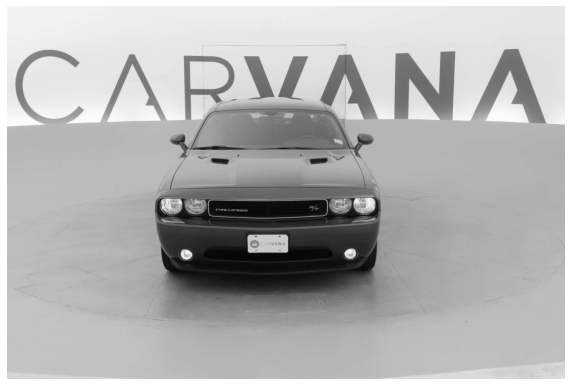

In [21]:
# Converts RGB to GRAY
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_img,cmap='gray')
plt.axis(False)
plt.show()

In [22]:
gray_img.shape

(1280, 1918)

In [23]:
img.shape

(1280, 1918, 3)

In [24]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

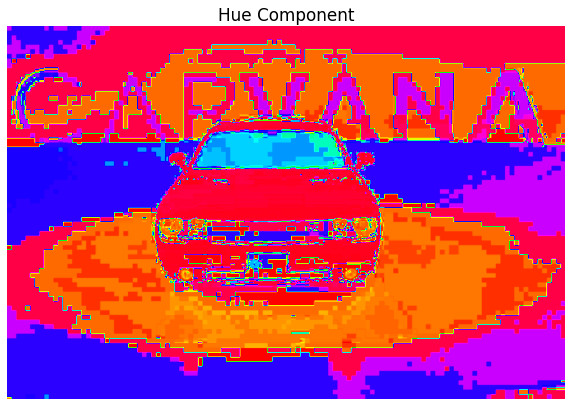

In [25]:
plt.figure(figsize=(10,10))

# Hue Component
plt.title('Hue Component')
plt.imshow(img1[:,:,0],cmap='hsv')
plt.axis(False)
plt.show()

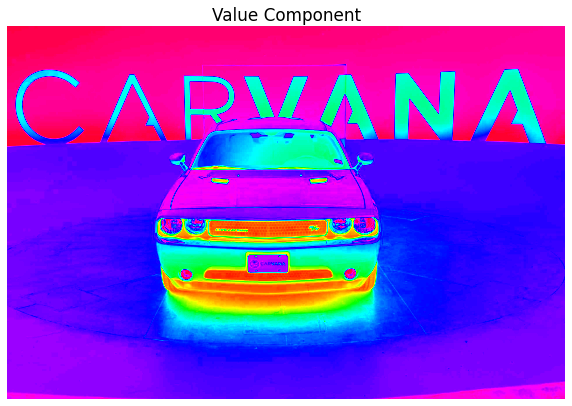

In [26]:
# Value Component
plt.figure(figsize=(10,10)) 

plt.title('Value Component')

plt.imshow(img1[:,:,2],cmap='hsv')
plt.axis(False)
plt.show()

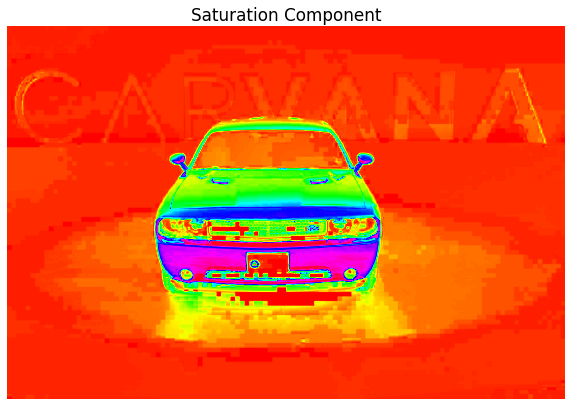

In [27]:
# Saturation Component
plt.figure(figsize=(10,10)) 

plt.title('Saturation Component')
plt.imshow(img1[:,:,1],cmap='hsv')
plt.axis(False)
plt.show()

In [41]:
img2 = img1[:,:,1]
kernel_size=(30, 30)

smoothen_img = cv2.blur(img2,kernel_size)

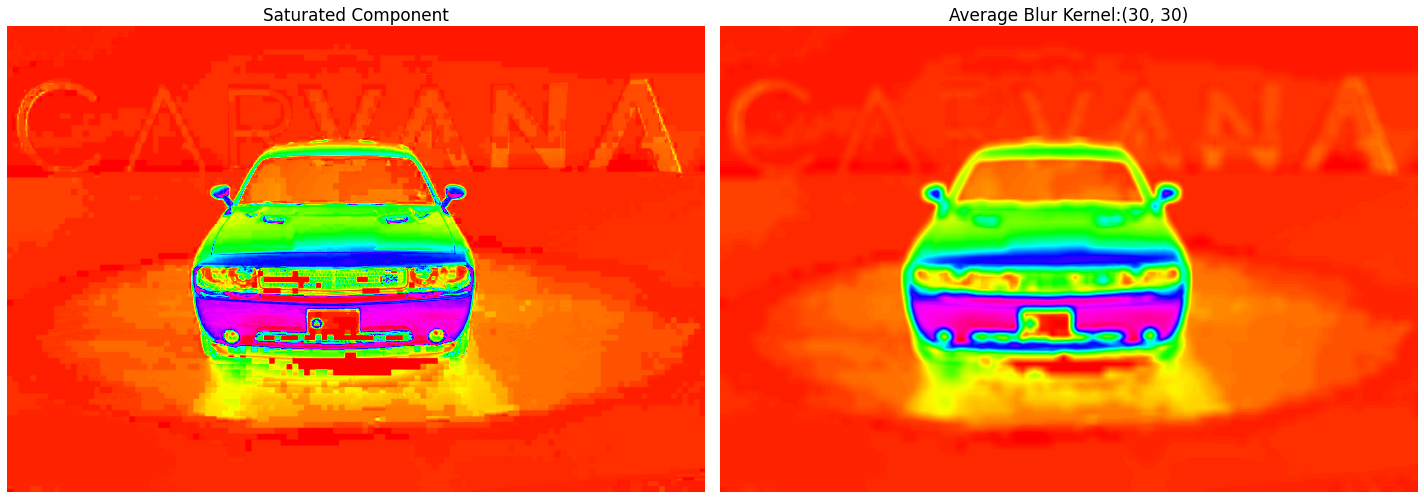

In [42]:
fig,ax = plt.subplots(1,2,figsize=(20,20))  

ax[0].set_title(f'Saturated Component') 
ax[0].imshow(img2,cmap='hsv')
ax[0].axis(False)
  
ax[1].set_title(f'Average Blur Kernel:{kernel_size}') 
ax[1].imshow(smoothen_img,cmap='hsv')
ax[1].axis(False)

plt.tight_layout()
plt.show()

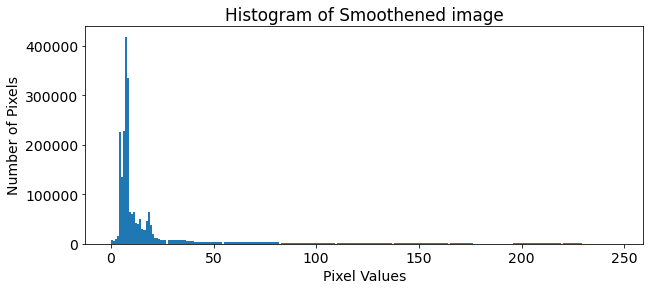

In [43]:
plt.figure(figsize=(10,4))
plt.hist(smoothen_img.ravel(), bins=256)
plt.title('Histogram of Smoothened image')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Values')
plt.savefig('histogram')
plt.show()

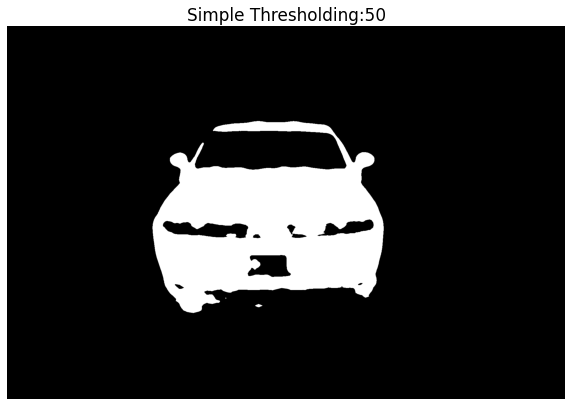

In [78]:
thresh_val = 50

_,thresh_img = cv2.threshold(smoothen_img,thresh_val,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.title(f'Simple Thresholding:{thresh_val}')
    
# Simple Thresholding

plt.imshow(thresh_img,cmap='gray')
plt.axis(False)
plt.show()

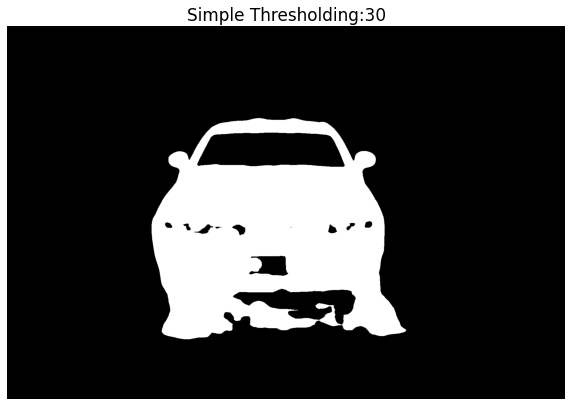

In [45]:
thresh_val = 30

_,thresh_img = cv2.threshold(smoothen_img,thresh_val,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.title(f'Simple Thresholding:{thresh_val}')
    
# Simple Thresholding

plt.imshow(thresh_img,cmap='gray')
plt.axis(False)
plt.show()

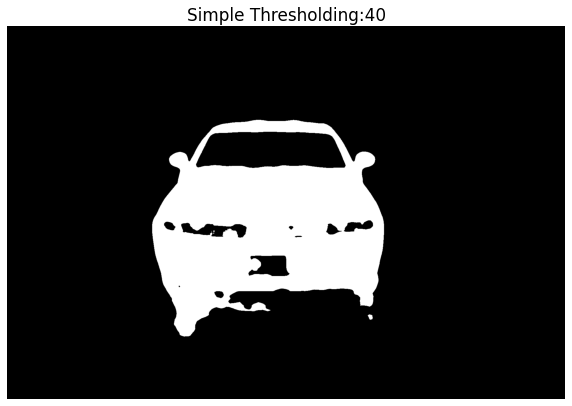

In [46]:
thresh_val = 40

_,thresh_img = cv2.threshold(smoothen_img,thresh_val,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.title(f'Simple Thresholding:{thresh_val}')
    
# Simple Thresholding

plt.imshow(thresh_img,cmap='gray')
plt.axis(False)
plt.show()

In [86]:
dilate = cv2.dilate(thresh_img,None,iterations= 15)
dilate = cv2.dilate(dilate,None,iterations= 15)
dilate = cv2.dilate(dilate,None,iterations= 15)

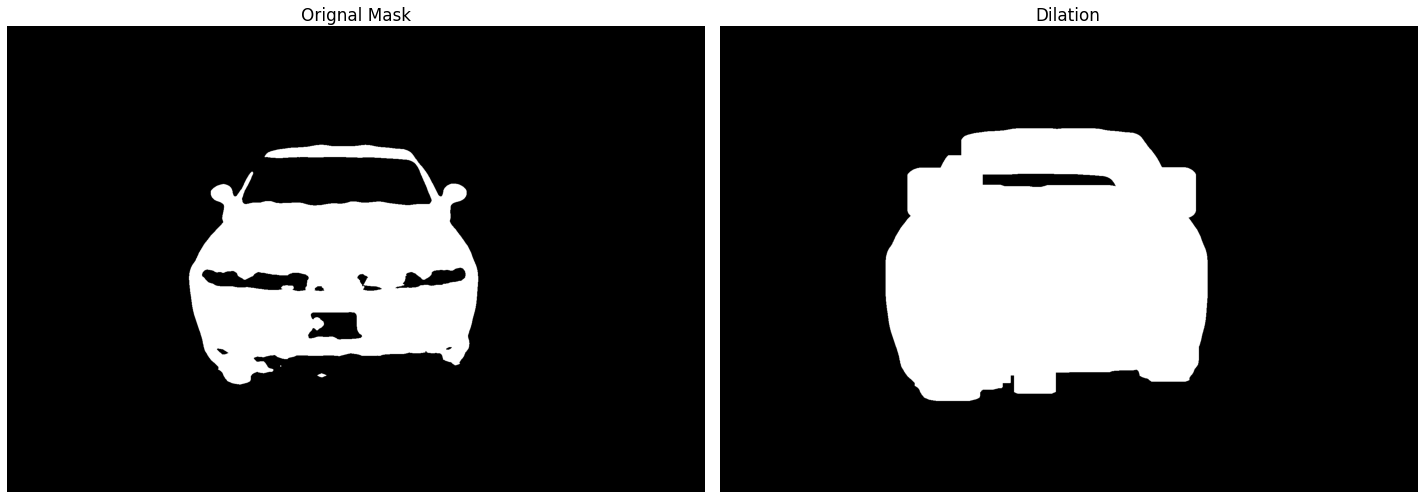

In [87]:
fig,ax = plt.subplots(1,2,figsize=(20,15)) 

ax[0].set_title(f'Orignal Mask')
ax[1].set_title(f'Dilation')

# Simple Thresholding
ax[0].imshow(thresh_img,cmap='gray')
ax[0].axis(False)

#Dilation
ax[1].imshow(dilate,cmap='gray')
ax[1].axis(False)
 
plt.tight_layout()
plt.show()


In [88]:
erode = cv2.erode(dilate,None,iterations= 10)
erode = cv2.erode(erode,None,iterations= 10)
erode = cv2.erode(erode,None,iterations= 10)

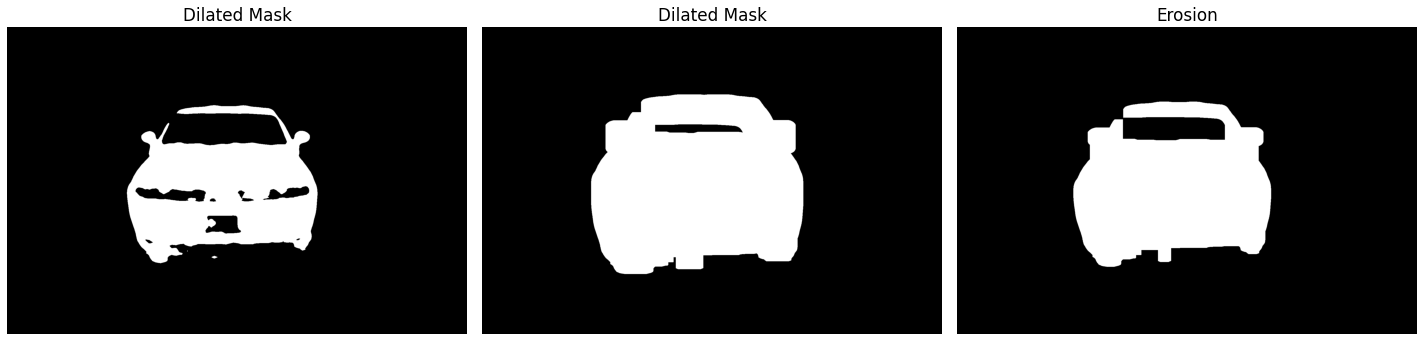

In [89]:
fig,ax = plt.subplots(1,3,figsize=(20,15)) 


ax[0].set_title(f'Dilated Mask')
ax[1].set_title(f'Dilated Mask')
ax[2].set_title(f'Erosion')

# Original
ax[0].imshow(thresh_img,cmap='gray')
ax[0].axis(False)

# dilate
ax[1].imshow(dilate,cmap='gray')
ax[1].axis(False)

#Erosion
ax[2].imshow(erode,cmap='gray')
ax[2].axis(False)
 
plt.tight_layout()
plt.show()



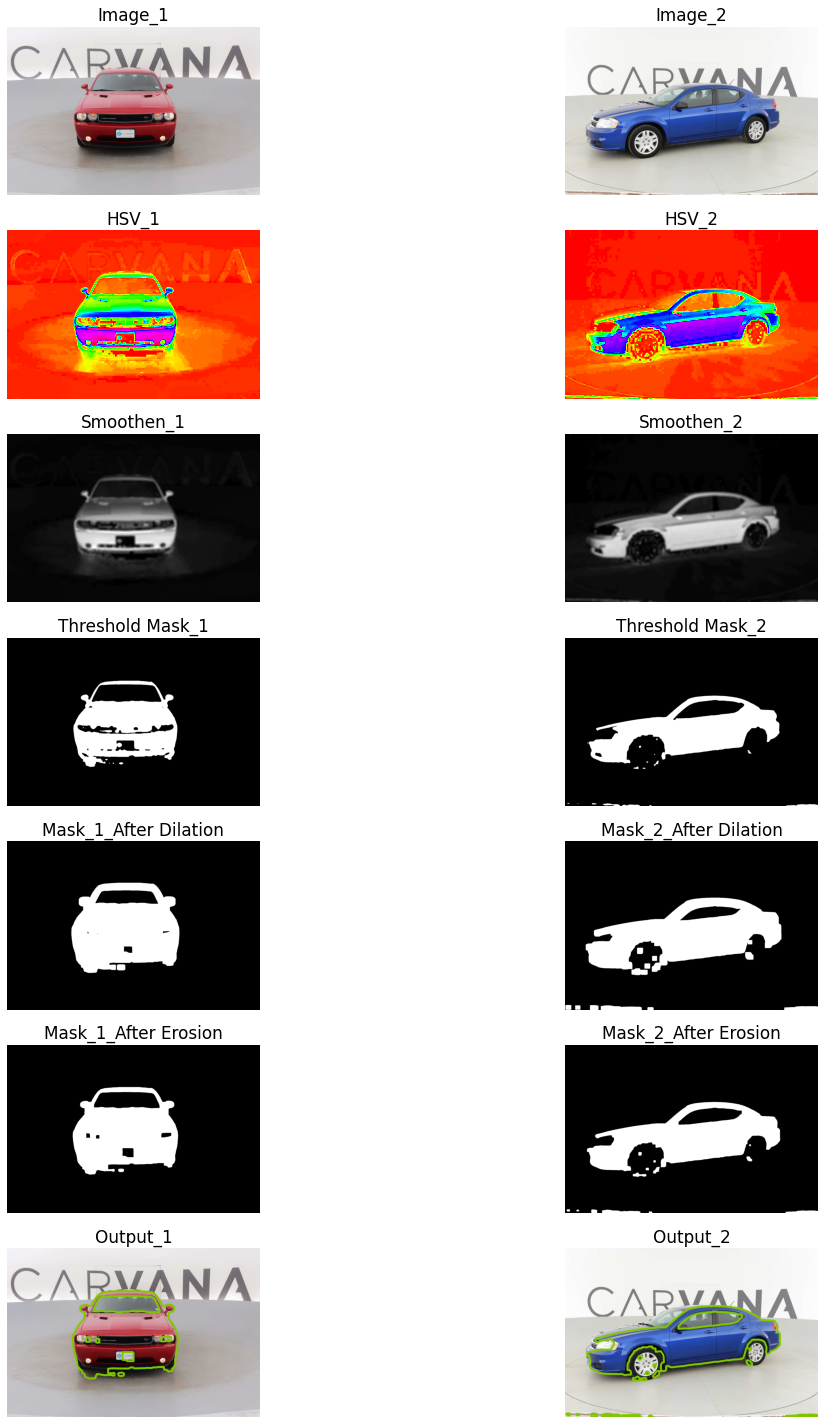

In [51]:
fig,ax = plt.subplots(7,2,figsize=(20,20)) 
image_files  = ['car1.jpg','car3.jpg']

for idx,files in enumerate(image_files):
  img = cv2.imread(files)
  org_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
  img = cv2.cvtColor(org_img,cv2.COLOR_RGB2HSV)
  
  img = img[:,:,1]

  blurred_img = cv2.blur(img,(20,20))
  
  _,thresh_img = cv2.threshold(blurred_img,50,255,cv2.THRESH_BINARY)
  
  dilated = cv2.dilate(thresh_img,None,iterations= 15)
  eroded = cv2.erode(dilated,None,iterations= 10)
  
  contours,_ = cv2.findContours(eroded,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  final_img = cv2.drawContours(org_img.copy(),contours, -1, (127,200,0), 13)
  
  ax[0,idx].set_title(f'Image_{idx+1}')
  ax[0,idx].imshow(org_img)
  ax[0,idx].axis(False) 

  ax[1,idx].set_title(f'HSV_{idx+1}')
  ax[1,idx].imshow(img,cmap='hsv')
  ax[1,idx].axis(False) 

  ax[2,idx].set_title(f'Smoothen_{idx+1}')
  ax[2,idx].imshow(blurred_img,cmap='gray')
  ax[2,idx].axis(False)

  ax[3,idx].set_title(f'Threshold Mask_{idx+1}')
  ax[3,idx].imshow(thresh_img,cmap='gray')
  ax[3,idx].axis(False)

  ax[4,idx].set_title(f'Mask_{idx+1}_After Dilation')
  ax[4,idx].imshow(dilated,cmap='gray')
  ax[4,idx].axis(False)

  ax[5,idx].set_title(f'Mask_{idx+1}_After Erosion')
  ax[5,idx].imshow(eroded,cmap='gray')
  ax[5,idx].axis(False)

  ax[6,idx].set_title(f'Output_{idx+1}')
  ax[6,idx].imshow(final_img)
  ax[6,idx].axis(False)   

plt.tight_layout()
plt.show()

## Doubt Session

In [53]:
from numpy.fft import fft2

In [65]:
image_files  = 'car1.jpg'
img = cv2.imread(image_files)

gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

fft_img = fft2(gray_img)

In [66]:
fft_img.shape

(1280, 1918)

In [67]:
img.shape

(1280, 1918, 3)

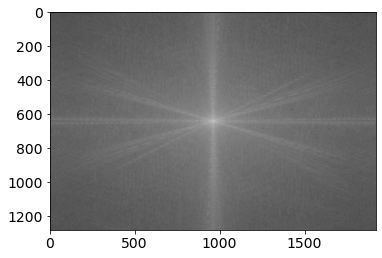

In [77]:
plt.figure()
plt.imshow(np.fft.fftshift(np.log(np.abs(fft_img))), cmap='gray')

In [64]:
scaled_im

array([[[1.00000000e+00, 4.64663935e-03, 4.64663935e-03],
        [8.01322290e-03, 1.31310544e-03, 1.17017229e-03],
        [6.58154871e-03, 1.17751443e-03, 9.18262036e-04],
        ...,
        [3.63014517e-03, 6.03295403e-04, 9.29935434e-04],
        [6.58154871e-03, 9.18262036e-04, 1.17751443e-03],
        [8.01322290e-03, 1.17017229e-03, 1.31310544e-03]],

       [[1.00000000e+00, 4.64663935e-03, 4.64663935e-03],
        [8.01322290e-03, 1.31310544e-03, 1.17017229e-03],
        [6.58154871e-03, 1.17751443e-03, 9.18262036e-04],
        ...,
        [3.63014517e-03, 6.03295403e-04, 9.29935434e-04],
        [6.58154871e-03, 9.18262036e-04, 1.17751443e-03],
        [8.01322290e-03, 1.17017229e-03, 1.31310544e-03]],

       [[1.00000000e+00, 4.64663935e-03, 4.64663935e-03],
        [8.01322290e-03, 1.31310544e-03, 1.17017229e-03],
        [6.58154871e-03, 1.17751443e-03, 9.18262036e-04],
        ...,
        [3.63014517e-03, 6.03295403e-04, 9.29935434e-04],
        [6.58154871e-03, 9.18

In [71]:
np.min(scaled_im)

0.0